In [1]:
import matplotlib.pyplot as plt
import numpy as np

import random
import time


# Test functions for profiling

def fast_func():
    time.sleep(random.uniform(0.01, 0.015))

def slow_func():
    time.sleep(random.uniform(0.015, 0.020))

In [2]:
def fixed_iterations_test(function1, function2, iterations: int=100):
    '''
    Produces profiling report on the performance of 2 functions
    with the given number of iterations run
    '''

    runtimes_1 = np.array([], dtype=float)
    runtimes_2 = np.array([], dtype=float)

    for i in range(iterations):
        start_time = time.time()
        function1()
        runtimes_1 = np.append(runtimes_1, time.time() - start_time)

        start_time = time.time()
        function2()
        runtimes_2 = np.append(runtimes_2, time.time() - start_time)
        if i % 10 == 0:
            print('running')

    plt.hist(runtimes_1, bins=10, alpha=0.5, label='fast')
    plt.hist(runtimes_2, bins=10, alpha=0.5, label='slow')
    plt.xlabel('Run Time', size=14)
    plt.ylabel("Count", size=14)
    plt.title("Performance of Vanilla PyMongo vs PySpark & PyMongo")
    plt.legend(loc='upper right')

running
running
running
running
running
running
running
running
running
running


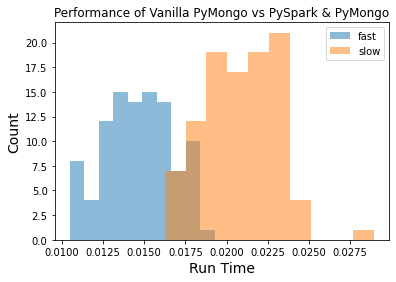

In [3]:
fixed_iterations_test(fast_func, slow_func)

In [14]:
def fixed_time_test(function1, function2, runtime_s: int=2):
    '''
    Produces profiling report on the performance of 2 functions
    with the given amount of time to run
    '''

    function1_iters = 0
    function2_iters = 0

    timeout_start = time.time()

    while time.time() < timeout_start + runtime_s:
        function1()
        function1_iters+=1

    timeout_start = time.time()

    while time.time() < timeout_start + runtime_s:
        function2()
        function2_iters+=1

    plt.bar(x=['Mongo', 'Spark'], height=[function1_iters, function2_iters])
    plt.xlabel('Technology', size=14)
    plt.ylabel(f'Iterations in {runtime_s} seconds', size=14)
    plt.title('Performance of Mongo vs Spark')

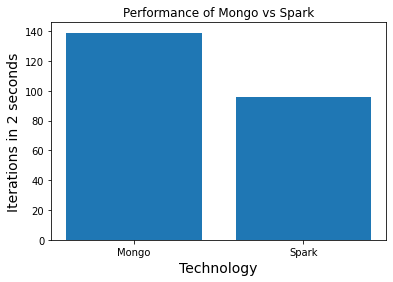

In [15]:
fixed_time_test(fast_func, slow_func)
# plt.bar(x=['a', 'b'], height=[1,2])

running
running
running
running
running
running
running
running
running
running


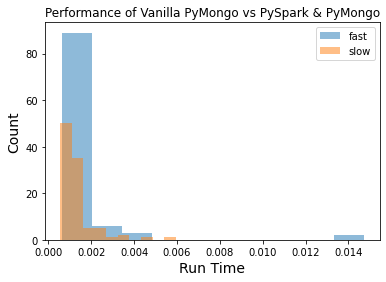

In [5]:
from mongo_queries import MongoSearch

MG = MongoSearch()
fixed_iterations_test(MG.randomUsersIds, MG.randomUsersIds)

In [60]:
def collect_performance_data_fixed_time(function1, function2, runtime_s: int=2):
    '''
    Collecting performance data of number of queries run over given time for mongo and spark,
    each entry is how long a query takes
    '''
    mongo_cumulative_data = np.array([])
    mongo_iterative_data = np.array([])
    spark_cumulative_data = np.array([])
    spark_iterative_data = np.array([])

    timeout_start = time.time()

    while time.time() < timeout_start + runtime_s:
        function1()
        mongo_cumulative_data = np.append(mongo_cumulative_data, time.time() - timeout_start)

    timeout_start = time.time()

    while time.time() < timeout_start + runtime_s:
        function2()
        spark_cumulative_data = np.append(spark_cumulative_data, time.time() - timeout_start)

    # Calculate iterative data
    mongo_iterative_data = convert_cumulative_to_iterative(mongo_cumulative_data)
    spark_iterative_data = convert_cumulative_to_iterative(spark_cumulative_data)


    return {'mongo_c': mongo_cumulative_data, 'mongo_i': mongo_iterative_data, 'spark_c': spark_cumulative_data, 'spark_i': spark_iterative_data}


def collect_performance_data_fixed_iters(function1, function2, iterations: int=100):
    '''
    Collecting performance data of number of queries run over given time for mongo and spark,
    each entry is how long a query takes
    '''
    mongo_cumulative_data = np.array([])
    mongo_iterative_data = np.array([])
    spark_cumulative_data = np.array([])
    spark_iterative_data = np.array([])


    start_time = time.time()
    for i in range(iterations):
        function1()
        mongo_cumulative_data = np.append(mongo_cumulative_data, time.time() - start_time)
        if i % 50 == 0:
            print('running')

    start_time = time.time()
    for i in range(iterations):
        function2()
        spark_cumulative_data = np.append(spark_cumulative_data, time.time() - start_time)
        if i % 50 == 0:
            print('running')

    # Calculate iterative data
    mongo_iterative_data = convert_cumulative_to_iterative(mongo_cumulative_data)
    spark_iterative_data = convert_cumulative_to_iterative(spark_cumulative_data)

    return {'mongo_c': mongo_cumulative_data, 'mongo_i': mongo_iterative_data, 'spark_c': spark_cumulative_data, 'spark_i': spark_iterative_data}


def convert_cumulative_to_iterative(cumulative_data):
    '''
    Extracts iterative performance data from the input cumulative data
    '''
    iterative_data = np.array([])

    for i, val in enumerate(cumulative_data):
        if i==0:
            iterative_data = np.append(iterative_data, val)
        else:
            iterative_data = np.append(iterative_data, val - cumulative_data[i-1])
    
    return iterative_data

In [37]:
data = np.array([])
cumulative = np.array([1, 2.5, 5, 5.01])
for i, val in enumerate(cumulative):
    if i==0:
        data = np.append(data, val)
    else:
        data = np.append(data, val - cumulative[i-1])
data

array([1.  , 1.5 , 2.5 , 0.01])

In [61]:
performance_data_fixed_time = collect_performance_data_fixed_time(slow_func, fast_func)
performance_data_fixed_iters = collect_performance_data_fixed_iters(slow_func, fast_func)

running
running
running
running


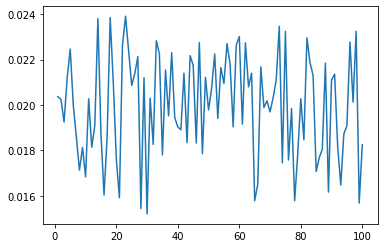

In [62]:
mongo_data = performance_data_fixed_iters['mongo_i']
plt.plot(list(range(1,len(mongo_data)+1)), mongo_data)

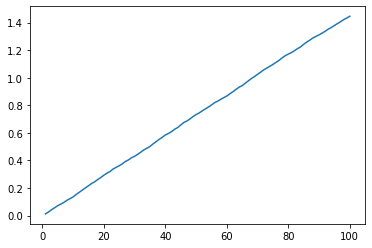

In [63]:
spark_data = performance_data_fixed_iters['spark_c']
plt.plot(list(range(1,len(spark_data)+1)), spark_data)

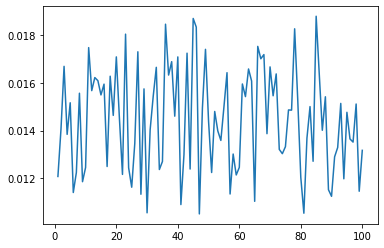

In [64]:
spark_data = performance_data_fixed_iters['spark_i']
plt.plot(list(range(1,len(spark_data)+1)), spark_data)